<a href="https://colab.research.google.com/github/Rafael-Junqueira/Rafael-Junqueira/blob/main/Profissao_Cientista_de_Dados_M13_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [39]:
from google.colab import files
uploaded = files.upload()
df.head(10)

Saving MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv.csv to MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv (3).csv


,"title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria"
0,"Pack 12 un, Leche extra proteína 1 L,Loncolech..."
1,"Pack 12 un, Leche chocolate receta original 1 ..."
2,"Pack 12 un, Leche semidescremada chocolate 1 L..."
3,"Pack 12 un, Leche semidescremada frutilla 1 L,..."
4,"Pack 12 un, Leche sin lactosa chocolate 1 L,Lo..."
5,"Pack 12 un, Leche sin lactosa frutilla 1 L,Lon..."
6,"Pack 12 un, Leche saborizada light chocolate 1..."
7,"Pack 12 un, Leche saborizada frutilla 1 L,Colu..."
8,"Pack 12 un, Leche saborizada vainilla 1 L,Colu..."
9,"Pack 12 un, Leche saborizada manjar 1 L,Colun,..."


from google.colab import files
uploaded = files.upload()
df.head(10)

Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [60]:
#Seu código aqui para a média
df.groupby('Categoria')['Preco_Normal'].mean().reset_index().sort_values(by='Preco_Normal', ascending=False).round(2)

,Categoria,Preco_Normal
1,comidas-preparadas,3095.04
5,lacteos,2385.22
2,congelados,2108.04
0,belleza-y-cuidado-personal,1783.56
3,frutas,1724.47
6,verduras,1343.30
4,instantaneos-y-sopas,765.49


In [59]:
#Seu código aqui para a mediana
df.groupby('Categoria')['Preco_Normal'].median().reset_index().sort_values(by='Preco_Normal', ascending=False).round(2)

,Categoria,Preco_Normal
1,comidas-preparadas,3290.0
0,belleza-y-cuidado-personal,1569.0
2,congelados,1519.0
3,frutas,1195.0
6,verduras,1180.0
5,lacteos,989.0
4,instantaneos-y-sopas,439.0


Digite aqui as categorias:

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [56]:
#Seu código aqui
desvio_padrao_por_Categoria = df.groupby('Categoria')['Preco_Normal'].std().reset_index().sort_values(by='Preco_Normal', ascending=False).round(2)
desvio_padrao_por_Categoria

,Categoria,Preco_Normal
5,lacteos,3925.82
0,belleza-y-cuidado-personal,2210.04
2,congelados,2111.54
1,comidas-preparadas,2019.91
3,frutas,1639.15
4,instantaneos-y-sopas,1170.23
6,verduras,1012.70


Digite nesse campo o comportamento que você identificou.
Como as categorias "belleza-y-cuidado-personal" e "lacteos" tem um desvio padrão maior isso indica que ambos possuem um valores muitos dispersos em relação a média. Ambas categorias possuem a média maior que a mediana, o que indica que possuem alguns outliers puxando os valores para cima.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

/tmp/ipython-input-503183268.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Preco_Normal', data=df_lacteos, palette='viridis')


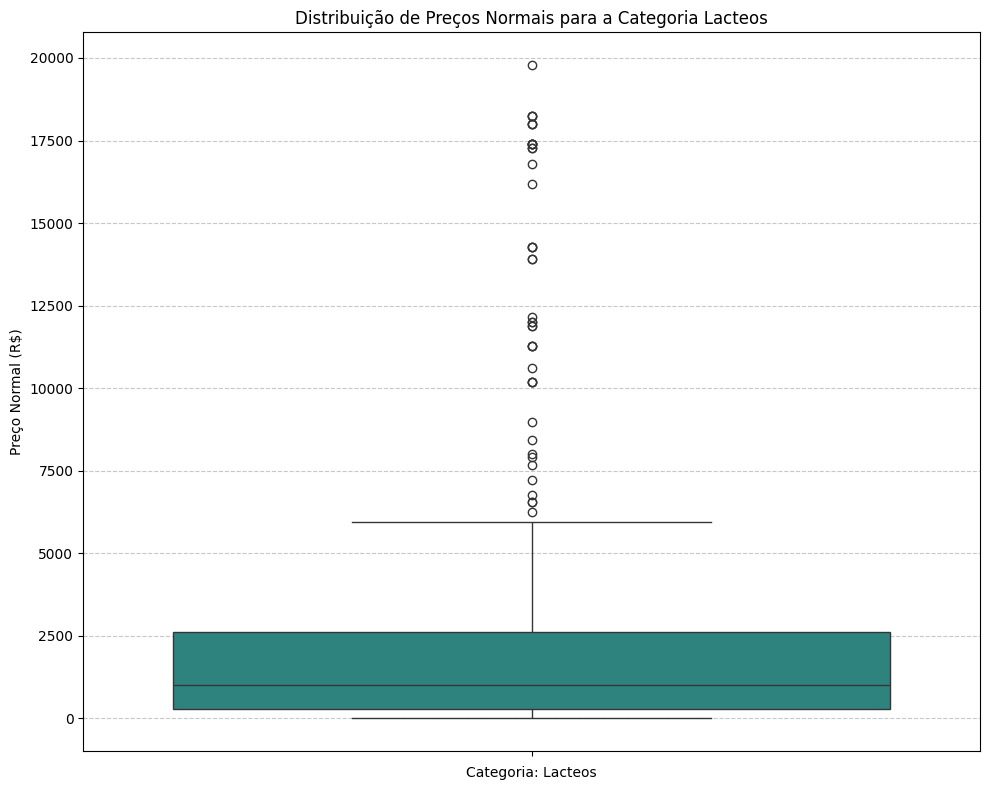

In [65]:
#Seu código aqui
df_lacteos = df[df['Categoria'] == 'lacteos']
plt.figure(figsize=(10, 8))
sns.boxplot(y='Preco_Normal', data=df_lacteos, palette='viridis')
plt.title('Distribuição de Preços Normais para a Categoria Lacteos')
plt.ylabel('Preço Normal (R$)')
plt.xlabel('Categoria: Lacteos')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Conforme mencionado no exercicio anterior é possível ver muito outliers levando o valor da media a ser bem superior ao valor da mediana.

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

/tmp/ipython-input-3606010515.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Categoria', y='Desconto', data=df, palette='viridis', errorbar=None)


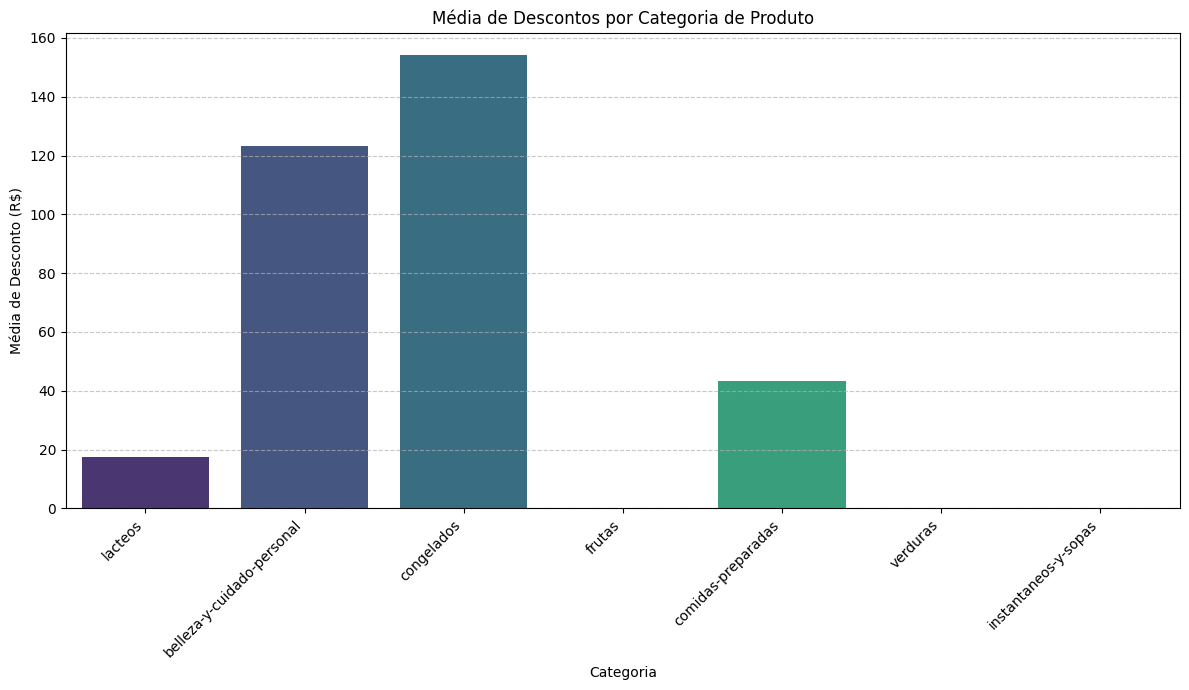

In [66]:
# Seu código aqui
plt.figure(figsize=(12, 7))
sns.barplot(x='Categoria', y='Desconto', data=df, palette='viridis', errorbar=None)
plt.title('Média de Descontos por Categoria de Produto')
plt.xlabel('Categoria')
plt.ylabel('Média de Desconto (R$)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

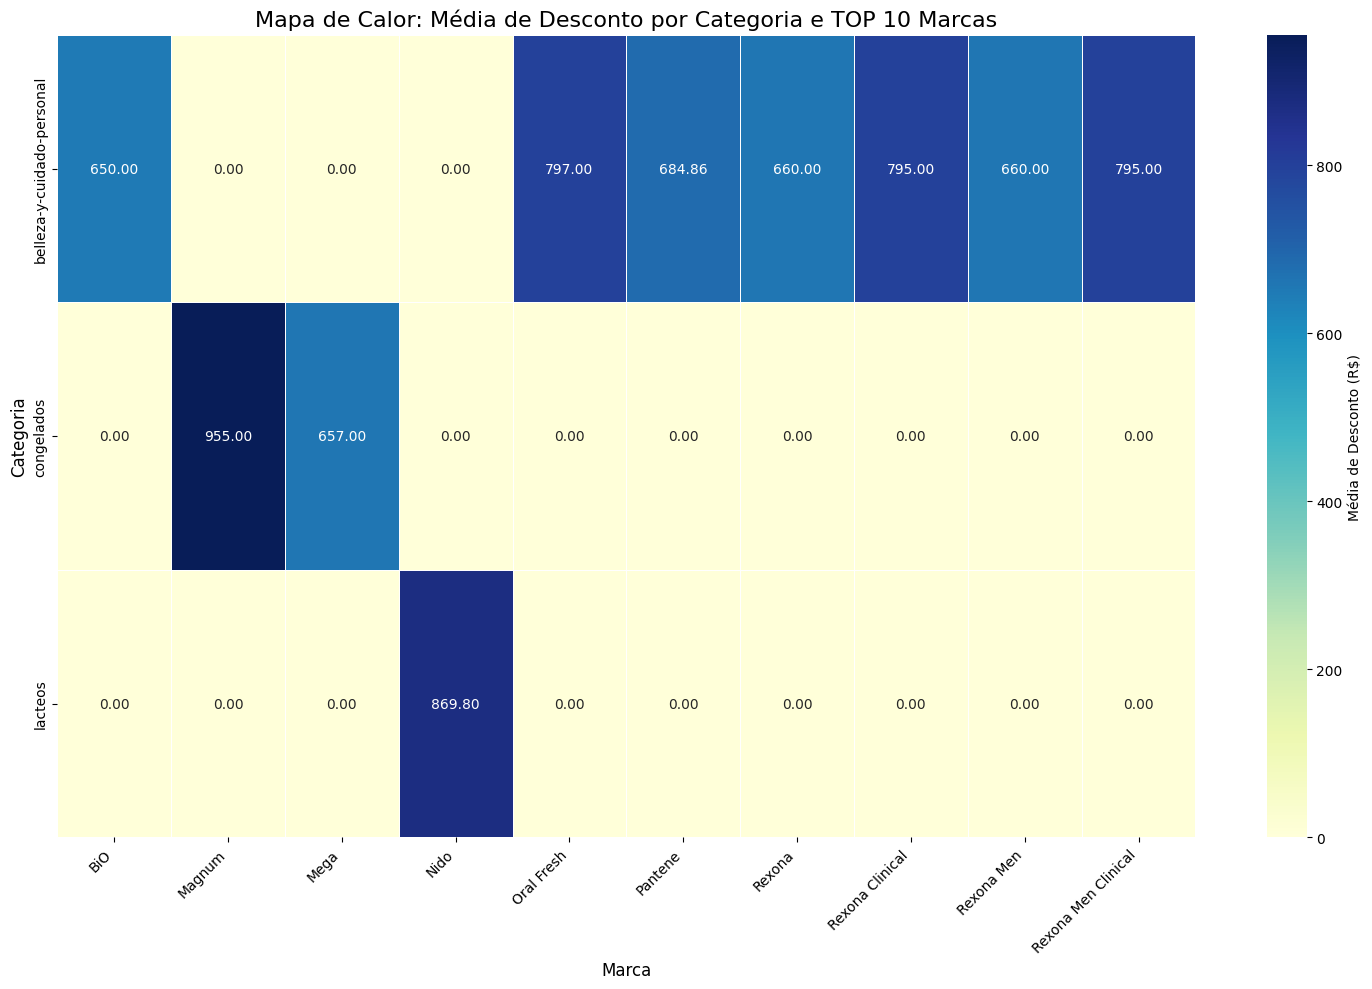

In [76]:
# Seu código aqui
media_desconto_por_marca = df.groupby('Marca')['Desconto'].mean().sort_values(ascending=False)

top_10_marcas = media_desconto_por_marca.head(10).index.tolist()

df_filtrado = df[df['Marca'].isin(top_10_marcas)]

df_agrupado_filtrado = df_filtrado.groupby(['Categoria', 'Marca'])['Desconto'].mean().unstack(fill_value=0)

# Criar o mapa de calor (heatmap) com os dados filtrados
plt.figure(figsize=(15, 10))
sns.heatmap(
    df_agrupado_filtrado,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=.5,
    cbar_kws={'label': 'Média de Desconto (R$)'}
)

# Adicionar título e rótulos
plt.title('Mapa de Calor: Média de Desconto por Categoria e TOP 10 Marcas', fontsize=16)
plt.xlabel('Marca', fontsize=12)
plt.ylabel('Categoria', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()